# overview:
- train splits
- bias and variance
- regularization techniques
    - l1+l2
    - drop out
- initialization
- gradient checking


# applying ML is iterative process

each specific tasks has hyperparameters that preform best depending on many variables such as data size, amount of compute available, etc. Hyperparameters include:

- \# of layers
- \# hidden layers
- activation functions
- learning

Need to try many different combinations of hyperparameter, how to do this and how to do it efficiently?

# train splits
split data into splits to train more efficiently
- train set
- dev set (cross validation set) : use to see how well models do on train set for different hyper params
- test set : use at end to get unbiased estimate of model's performance (that way your not fine tuning to the dev set)

Traditional train set is 70% of data with test and dev is 15% each (small data)

In modern day applications (big data) splits have become a lot smaller (98% train, 1% test set, 1% dev set)

Mismatched Train sets -> training data is high quality but dev/test set is user uploaded images (low quality)
- need to make sure dev/test set comes from same distribution as train set
- difficult today due to large quantity of data gathered

Don't always need a test set (only dev set) -> might lead to found hyper parameters over fitting the dev set without a way of checking

# Bias & Variance

**Bias** : high bias -> under fitting data
**Variance** : high variance -> over fitting data

![bandv](https://i.sstatic.net/yhkx4.jpg)
![bandv](https://i.sstatic.net/qxbLf.png)


example:
- Train set error : 1%, Dev set error : 11% -> high variance
- Train set error : 15%, Dev set error : 16% -> high bias (its not even fitting the dataset)
- Train set error : 15%, Dev set error : 30% -> high bias + high variance 
- Train set error : 0.5%, Dev set error : 1% -> low bias + low variance

in this example we assume human herror is roughly 0%, but if human error (bayes error) was 15%, then example 2 would be considered to have low bias + low variance

# Best practices in training
hight bias? if so try this until you can fit the data sell
- Bigger network
- longer training
- Try to find better NN architecture

Once bias is low, high variance? if so
- get more data
- Regularization
- Try to find better NN architecture

It used to be that variance and bias were a trade off, but today there are techniques where we don't have a tradeoff we can decrease one without increasing the other


# Regularization 
Helps to prevent overfilling(high variance)

apply a penalty to weights with large values

## in logistic regretion
```python
b = float
w = list[float]

_lambda = regularization_parameter # another hyperparameter

J(w,b) = 1/m * np.sum(loss(y_hat,y) + regularization

# L2 regularization : 2 different ways same result
l2 = np.sum(w**2)
l2 = w.T @ w

# L1 regularization : 
l1 = (_lambda / m) * np.sum(np.abs(w))
```

In neural network forward pass

```python
layer_dims = list[int]
w[l] == np.shape(layer_dims[i],layer_dims[i-1])

#L2 regularization term 
regularization = 0
for l in range(1, L+1):  # for each layer
    regularization += np.sum(w[l]**2)

# Total cost with regularization
J = (1/m) * loss + (_lambda / (2*m)) * regularization
```

In neural network backdrop

```python
dw[l] = dw_from_backprop + ((_lambda/m) * w[l])

w[l] = w[l] - learning_rate * dw[l]

```

This is also called weight decay

## why does this prevent over fitting

cranking _lambda would zero out impact of many neurons as W has been zeroed out, causing the network to behave more like a smaller network

Discourages large weight values as it pushes weight values closer to 0

Near 0 values of tanh behave like a liner function

If all layers operate in a nearly linear function, the entire deep network behaves like a single linear model.

A linear model cannot fit complex boundaries, which prevents overfitting.

Therefore, L2 regularization simplifies the model’s functional capacity.

# Dropout Regularization

For each training example; For each layer, eliminate % of each nodes by removing all input and outputs of that node

In essence we are training a smaller network for each example

keep_prob = 0 < x < 1

To not change expected value of z[l] need to scale a[l-1] up by 1/keep_prob,  keeping expected value the same

```python

a[l-1].shape == (n[l-1], m)

# create dropout mask for layer l
d[l] = np.random.rand(a[l-1].shape[0], a[l-1].shape[1]) < keep_prob

# apply mask
a[l-1] = a[l-1] * d[l]

# scale activations to keep expected value the same
a[l-1] = a[l-1] / keep_prob

# forward prop 
z[l] = W[l] @ a[l-1] + b[l]
a[l] = g(z[l])
```

at test do not implement any drop out
```python
a[0] = X # test set
z[l] = w[l] @ (a[l-1]) + b[l]
```

A node cannot rely heavily on any single input because that input may be dropped, weights have to be spread out

ultimately it helps over fitting, so if model is not over fitting you don't need to implement this

Dropout can be applied to the input layer, but usually with a very high keep_prob (close to 1) because removing many input features often harms performance.

Layers can vary amount of dropout each layer receives

Issue : function J is not well defined, harder to debug. Solution is to momentarily disable drop out to verify loss is going down

# other regularization methods
## data augmentation
In image processing getting more data is expensive
- can flip images horizontally to double dataset size, not as good as getting double the amount of data but still better than nothing
- can also rotate image/zoom in/add random distortions

## early stopping
- plot training error and dev error
- dev error will go down and then may go back up
- find iteration with lowest dev error
- stopping halfway will cause weights to have values closer to 0
- Issue: have to focus on two problems (optimization for cost and not over fitting)

# Normalizing training sets
2 steps:
- zero out mean, 
```python
mean = np.mean(X)
X = X - mean 
```
- Normalize variance

```python
variance_squared = np.mean(X**2)
X = X / variance_squared

```

Use same mean and variance_squared values for both test and train datasets

![im](https://media.licdn.com/dms/image/v2/D4D12AQEmTWsSRV9wbQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1693152157902?e=2147483647&v=beta&t=aeYjwTPfkBbhANUBJln8kxnHBB8TBM7qtSGA8YTj8zk)

Taking steps on 1 axis/feature might be relatively large compared to taking steps on another axis

Normalizing data would allow each step to be of similar size for each axis / feature as the features are on the same scale

It never does any harm to normalize input features

# Vanishing & Exploding Gradients

Vanishing/exploding gradients refer to derivatives becoming extremely small or extremely large during back prop.

When number of layers is large this is common 

In forward pass, many weight matrices are multiplied together for each 

If weights are even slightly larger than 1, activations grow exponentially -> exploding activations and gradients

If weights are even slightly smaller than 1, activations shrink exponentially -> vanishing activations and gradients

careful choice of weight initialization can help to remedy this issue

```python
X.shape = (n,)
z = np.dot(w,X)
```

# Weight initialization

To not have explosion and vanishing; we want the larger that n is -> the smaller w should be

weight variance should decrease as the number of inputs increases

```python
W[l] = np.random.rand(shape) * np.sqrt(1/n[l-1])
```

doesn't solve, but helps to reduce

does depend on activation function

relu : `np.random.rand(shape) * np.sqrt(2/n[l-1])` : He Initialization

tanh : `np.random.rand(shape) * np.sqrt(1/n[l-1])` : xavier initialization

many more types

This can be further tuned as a hyper parameter

# Gradient Checking

implementing back propagation can be tricky, gradient checking helps verify correctness during debugging

method of checking if your derivative function is correct

method:
- reshape W and b vectors for all layers into one flat vector theta
- reshape dW and db into vector flat dtheta

Now cost is J(theta)


```python
theta = flatten_all_parameters(W1, b1, W2, b2, ... )
dtheta = flatten_all_gradients(dW1, db1, dW2, db2, ...)

epsilon = 1e-7
dtheta_approx = np.zeros_like(theta)

for i in range(len(theta)):
    theta_plus = theta.copy()
    theta_minus = theta.copy()
    
    theta_plus[i] += epsilon
    theta_minus[i] -= epsilon
    
    J_plus = compute_cost(theta_plus)
    J_minus = compute_cost(theta_minus)
    
    dtheta_approx[i] = (J_plus - J_minus) / (2 * epsilon)

# compare
numerator = np.linalg.norm(dtheta_approx - dtheta)
denominator = np.linalg.norm(dtheta_approx) + np.linalg.norm(dtheta)
difference = numerator / denominator

print("Gradient check difference:", difference)
```
If model fails grad check, check components to help identify bug

remember regularization term, include it in cost function

Turn of dropout layers when running

Run at random intimidations, also possibly after model has ran and tuned it parameters 


We take 1 parameter of out model and apply +- epsilon to it and do a forward pass of the function seeing how much the cost function changes, then compare that to the gradient that back prop has determined; repeat for all parameters.

divide norm of difference by norm of sum, result should be less then 1e-8 if backprop it correct


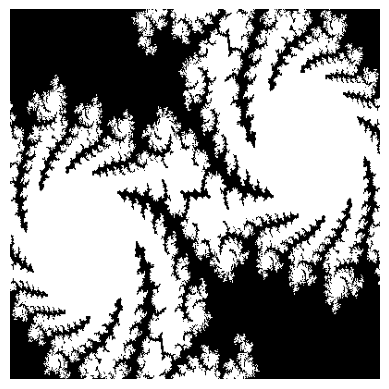

In [52]:
# generate training data
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#stolen from stack overflow
def julia_set(w=1000, h=1000, zoom=1.5, cX=-0.7, cY=0.27015, moveX=0.0, moveY=0.0, maxIter=150):
    arr = np.zeros((h, w), dtype=np.int16)

    for x in range(w):
        for y in range(h):
            zx = 1.5 * (x - w / 2) / (0.5 * zoom * w) + moveX
            zy = 1.0 * (y - h / 2) / (0.5 * zoom * h) + moveY
            i = maxIter
            while zx * zx + zy * zy < 4 and i > 1:
                tmp = zx * zx - zy * zy + cX
                zy, zx = 2.0 * zx * zy + cY, tmp
                i -= 1
            arr[y, x] = 1 if i == 1 else 0

    return arr


julia_set_train = julia_set(400, 400, zoom=2,maxIter=100)
plt.imshow(julia_set_train, cmap="gray")
plt.axis("off")
plt.show()


coordinates = []
for i,row in enumerate(julia_set_train):
    for j,pixel in enumerate(julia_set_train[i]):
        coordinates.append([i,j])

coordinates = np.array(coordinates)
coordinates = np.stack(coordinates,axis=-1)
labels = julia_set_train.flatten()

In [90]:
sample_index= np.random.choice(len(labels), size=3000, replace=False)
coordinates_sample = coordinates[:, sample_index]
labels_sample = labels[sample_index]
coordinates_sample

array([[-2.50626566e-03, -1.81704261e+00,  4.08521303e-01, ...,
        -1.53634085e+00,  8.09523810e-01, -3.33333333e-01],
       [ 4.18546366e-01, -2.56892231e+00, -1.32832080e-01, ...,
        -6.14035088e-01, -2.00751880e+00, -1.63659148e+00]],
      shape=(2, 3000))

In [96]:
labels

array([0, 0, 0, ..., 0, 0, 0], shape=(160000,), dtype=int16)

In [101]:
print(coordinates[:, 30000:30010])  # First 5 coordinates
# print(labels[30000:30010])  # First 5 labels
# print(julia_set_train[30000:30010])  # Should match labels if order is correct

[[-5.4962406  -5.4962406  -5.4962406  -5.4962406  -5.4962406  -5.4962406
  -5.4962406  -5.4962406  -5.4962406  -5.4962406 ]
 [-7.         -6.97994987 -6.95989975 -6.93984962 -6.9197995  -6.89974937
  -6.87969925 -6.85964912 -6.839599   -6.81954887]]


In [91]:
def relu_derivative(input):
    return np.array(input >0).astype(float)
def relu_function(input):
    return np.maximum(input,0)
def tanh_derivative(x):
    return 1 - np.tanh(x)**2
def tanh_function(x):
    return np.tanh(x)
def sigmoid_function(x):
    return 1 / ( 1 + np.exp(-x))
def sigmoid_derivative(x):
    sigmoid = 1 / ( 1 + np.exp(-x))
    return sigmoid * (1 - sigmoid)
def bce_function(y_true, y_predicted):
    eps=1e-8
    #clip any value smaller than eps as log(0) == Nan
    y_predicted = np.clip(y_predicted, eps, 1 - eps)  
    loss = -np.mean(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))

    return loss

def bce_grad(y_true, y_pred):
    eps=1e-8
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return (y_pred - y_true) / (y_pred * (1 - y_pred) * len(y_true))
    return -(y_true / y_pred) + (1 - y_true) / (1 - y_pred)

class Layer:
    def __init__(self,num_inputs,num_outputs,activation,activation_derivative):
        self.W = (np.random.rand(num_outputs,num_inputs) * 2 )- 1  
        self.b = np.zeros((num_outputs,1))
        self.activation = activation
        self.activation_derivative = activation_derivative
    def forward(self,prev_a):
        self.prev_a = prev_a
        # linear transformation 
        self.z = self.W @ prev_a + self.b
        # activation
        self.a = self.activation(self.z)
        return self.a

    def backward(self,da):
        # find dz using da received from layer+1 dJ/dz = dJ/da * da/dz
        # da/dz = dJ/da * activation derivative
        dz = da * self.activation_derivative(self.z)
        batch_size = self.prev_a.shape[1]

        #find dw: dz @ prev_a.T: (num_outputs, batch_size) @ (batch_size, num_inputs) = (num_outputs, num_inputs)
        # divide by batch size to get average over our batch
        self.dw = (dz @ self.prev_a.T) / batch_size
        #find db: similar to dw
        #use mean to find average gradient of each bias over our many batches
        self.db = np.sum(dz, axis=1, keepdims=True) / batch_size # (8, 1)
        #find prev_da to send to layer-1
        #W.T @ dz: (num_inputs, num_outputs) @ (num_outputs, batch_size) = (num_inputs, batch_size)
        prev_da = self.W.T @ dz  
        return prev_da

    def tune(self,learning_rate):
        #update weights and biases with gradient after back prop
        self.W -= learning_rate * self.dw
        self.b -= learning_rate * self.db
class MLP:
    def __init__(self,layers:list[Layer],loss_fun,loss_grad):
        self.loss_fun = loss_fun
        self.loss_grad = loss_grad
        self.layers:list[Layer] = layers
    def forward(self,activations,y_true):
        self.y_true = y_true
        self.activations = activations
        for layer in self.layers:
            self.activations = layer.forward(self.activations)
        self.loss = self.loss_fun(y_true,self.activations)
        return self.loss

    def backward(self):
        #find gradient of our loss function
        j_wrt_a = self.loss_grad(self.y_true,self.activations)
        #send back through to each layer to update dW and db for each layer
        for layer in reversed(self.layers):
            j_wrt_a = layer.backward(j_wrt_a)
    
    def tune(self,learning_rate):
        for layer in self.layers:
            layer.tune(learning_rate)



layers = [
    Layer(2,200,tanh_function,tanh_derivative),
    Layer(200,200,tanh_function,tanh_derivative),
    Layer(200,200,tanh_function,tanh_derivative),
    Layer(200,200,tanh_function,tanh_derivative),
    Layer(200,200,tanh_function,tanh_derivative),
    Layer(200,200,tanh_function,tanh_derivative),
    Layer(200,1,sigmoid_function, sigmoid_derivative),
]
# layers = [
#     Layer(2,200,relu_function,relu_derivative),
#     Layer(200,200,relu_function,relu_derivative),
#     Layer(200,200,relu_function,relu_derivative),
#     Layer(200,200,relu_function,relu_derivative),
#     Layer(200,200,relu_function,relu_derivative),
#     Layer(200,200,relu_function,relu_derivative),
#     Layer(200,1,sigmoid_function, sigmoid_derivative),
# ]
mlp = MLP(layers,loss_fun = bce_function , loss_grad=bce_grad )
learning_rate = 0.001
#normalize coordinates
coordinates = (coordinates - (np.max(coordinates)/2)) / (np.max(coordinates)/2)

loss_time = []
accuracy = []
accuracy_iteration = []
for i in range(300):
    # mini batch
    sample_index= np.random.choice(len(labels), size=3000, replace=False)
    coordinates_sample = coordinates[:, sample_index]
    labels_sample = labels[sample_index]
    labels_sample = np.reshape(labels_sample,(1,-1))



    loss = mlp.forward(
        activations= coordinates_sample,
        y_true=labels_sample)
    mlp.backward()
    mlp.tune(learning_rate)

    if i % 25 == 0:
        #run model on whole dataset to get accuracy 
        mlp.forward(
            activations=coordinates,
            y_true=np.reshape(labels,(1,-1))
        )
        predicted = mlp.activations
        predicted_image = predicted.reshape(julia_set_train.shape)
        predicted_binary = (predicted_image > 0.5).astype(int)
        acc = np.mean(predicted_binary == labels.reshape(julia_set_train.shape))
        accuracy.append([acc,i])


        print(f"{loss=},{acc=} at {i}")
    loss_time.append(loss)
accuracy = np.array(accuracy)
# plt.figure(figsize=(8,4))
plt.plot(loss_time)
plt.title("Training Loss over Iterations")
plt.show()
plt.plot(accuracy[:,1],accuracy[:,0])
plt.title("Accuracy over Iterations")
plt.show()

loss=np.float64(2.4606841787266247),acc=np.float64(0.52115) at 0
loss=np.float64(1.0998813267614456),acc=np.float64(0.67354375) at 25
loss=np.float64(0.8730563586037347),acc=np.float64(0.7054) at 50
loss=np.float64(0.7744956032255655),acc=np.float64(0.72514375) at 75


KeyboardInterrupt: 

In [50]:
predicted.reshape(julia_set_train.shape) 

array([[1.70048806e-03, 9.42590202e-06, 7.06217449e-05, ...,
        6.10049469e-03, 5.41636608e-03, 4.85236628e-03],
       [1.30434413e-03, 4.87548149e-05, 1.84574488e-06, ...,
        1.43840514e-03, 1.40568111e-03, 1.38438329e-03],
       [3.93111525e-03, 2.34044158e-04, 2.51298339e-05, ...,
        6.57498435e-04, 6.57005459e-04, 6.56415802e-04],
       ...,
       [1.15494219e-01, 7.43782006e-02, 4.71651419e-02, ...,
        8.97795841e-06, 4.46261527e-06, 2.25605285e-06],
       [1.24518812e-01, 8.01399267e-02, 5.03663344e-02, ...,
        1.15678610e-05, 7.47832542e-06, 3.75474527e-06],
       [1.33807016e-01, 8.62202937e-02, 5.38192563e-02, ...,
        9.50916541e-06, 9.47927817e-06, 6.29021932e-06]], shape=(400, 400))

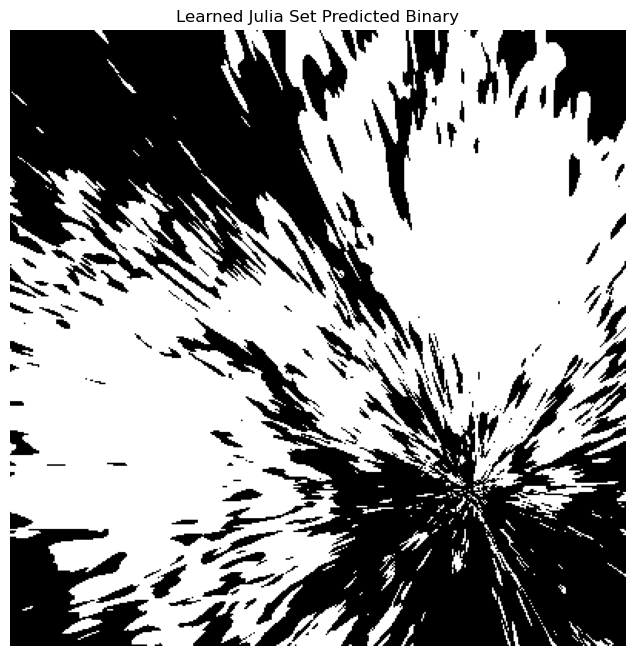

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

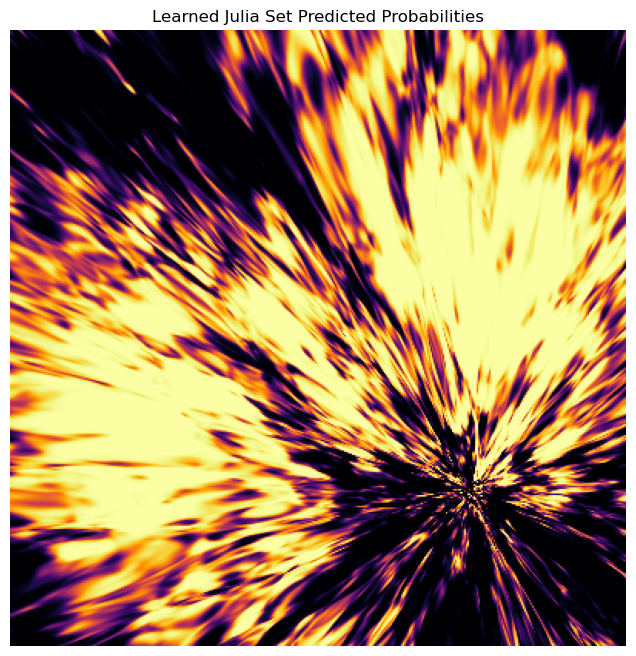

In [57]:
mlp.forward(
    activations=coordinates,  # shape (2, N)
    
    y_true=np.reshape(labels,(1,-1))# not used except for loss calc
)

predicted = mlp.activations
predicted_image = predicted.reshape(julia_set_train.shape)
predicted_binary = (predicted_image > 0.5).astype(int)

plt.figure(figsize=(8, 8))
plt.title("Learned Julia Set Predicted Binary")
plt.imshow((predicted_image > 0.5), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 8))
plt.title("Learned Julia Set Predicted Probabilities")
plt.imshow(predicted_image, cmap='inferno')
plt.axis('off')

In [ ]:
#Ai generated
def gradient_check(mlp, X, y, epsilon=1e-7, threshold=1e-5):
    """
    Performs gradient checking on the MLP model.
    
    Args:
        mlp: The MLP model instance
        X: Input data (features, batch_size)
        y: True labels (1, batch_size)
        epsilon: Small value for numerical gradient computation
        threshold: Acceptable difference between analytical and numerical gradients
    
    Returns:
        bool: True if gradient check passes, False otherwise
    """
    print("Starting gradient checking...")
    
    # Forward pass to compute loss
    mlp.forward(X, y)
    
    # Backward pass to compute analytical gradients
    mlp.backward()
    
    # Store analytical gradients
    analytical_grads = []
    for layer in mlp.layers:
        analytical_grads.append({
            'dw': layer.dw.copy(),
            'db': layer.db.copy()
        })
    
    # Compute numerical gradients for each layer
    all_passed = True
    
    for layer_idx, layer in enumerate(mlp.layers):
        print(f"\nChecking Layer {layer_idx + 1}:")
        
        # Check weights
        numerical_dw = np.zeros_like(layer.W)
        for i in range(layer.W.shape[0]):
            for j in range(layer.W.shape[1]):
                # Perturb weight positively
                original_val = layer.W[i, j]
                layer.W[i, j] = original_val + epsilon
                loss_plus = mlp.forward(X, y)
                
                # Perturb weight negatively
                layer.W[i, j] = original_val - epsilon
                loss_minus = mlp.forward(X, y)
                
                # Compute numerical gradient
                numerical_dw[i, j] = (loss_plus - loss_minus) / (2 * epsilon)
                
                # Restore original value
                layer.W[i, j] = original_val
        
        # Check biases
        numerical_db = np.zeros_like(layer.b)
        for i in range(layer.b.shape[0]):
            # Perturb bias positively
            original_val = layer.b[i, 0]
            layer.b[i, 0] = original_val + epsilon
            loss_plus = mlp.forward(X, y)
            
            # Perturb bias negatively
            layer.b[i, 0] = original_val - epsilon
            loss_minus = mlp.forward(X, y)
            
            # Compute numerical gradient
            numerical_db[i, 0] = (loss_plus - loss_minus) / (2 * epsilon)
            
            # Restore original value
            layer.b[i, 0] = original_val
        
        # Compare analytical and numerical gradients
        analytical_dw = analytical_grads[layer_idx]['dw']
        analytical_db = analytical_grads[layer_idx]['db']
        
        # Compute relative error for weights
        diff_w = np.linalg.norm(analytical_dw - numerical_dw)
        norm_w = np.linalg.norm(analytical_dw) + np.linalg.norm(numerical_dw)
        relative_error_w = diff_w / (norm_w + 1e-10)
        
        # Compute relative error for biases
        diff_b = np.linalg.norm(analytical_db - numerical_db)
        norm_b = np.linalg.norm(analytical_db) + np.linalg.norm(numerical_db)
        relative_error_b = diff_b / (norm_b + 1e-10)
        
        print(f"  Weights - Relative Error: {relative_error_w:.2e}")
        print(f"  Biases  - Relative Error: {relative_error_b:.2e}")
        
        # Check if gradients match within threshold
        w_passed = relative_error_w < threshold
        b_passed = relative_error_b < threshold
        
        if w_passed and b_passed:
            print(f"  ✓ Layer {layer_idx + 1} PASSED")
        else:
            print(f"  ✗ Layer {layer_idx + 1} FAILED")
            if not w_passed:
                print(f"    Weights exceed threshold: {relative_error_w:.2e} > {threshold:.2e}")
            if not b_passed:
                print(f"    Biases exceed threshold: {relative_error_b:.2e} > {threshold:.2e}")
            all_passed = False
    
    print("\n" + "="*50)
    if all_passed:
        print("✓ GRADIENT CHECK PASSED - Backpropagation is correct!")
    else:
        print("✗ GRADIENT CHECK FAILED - Check your backpropagation implementation")
    print("="*50)
    
    return all_passed


# Example usage with your model:
# Select a small subset for gradient checking (faster computation)
sample_size = 10
sample_indices = np.random.choice(len(labels), size=sample_size, replace=False)
X_check = coordinates[:, sample_indices]
y_check = labels[sample_indices].reshape(1, -1)

# Run gradient check
gradient_check(mlp, X_check, y_check, epsilon=1e-7, threshold=1e-5)

Starting gradient checking...

Checking Layer 1:
  Weights - Relative Error: 7.86e-09
  Biases  - Relative Error: 5.56e-09
  ✓ Layer 1 PASSED

Checking Layer 2:
  Weights - Relative Error: 4.00e-08
  Biases  - Relative Error: 1.80e-08
  ✓ Layer 2 PASSED

Checking Layer 3:
  Weights - Relative Error: 2.20e-08
  Biases  - Relative Error: 2.00e-08
  ✓ Layer 3 PASSED

Checking Layer 4:
  Weights - Relative Error: 1.66e-08
  Biases  - Relative Error: 1.67e-08
  ✓ Layer 4 PASSED

Checking Layer 5:
  Weights - Relative Error: 1.55e-08
  Biases  - Relative Error: 1.51e-08
  ✓ Layer 5 PASSED

Checking Layer 6:


KeyboardInterrupt: 